In [40]:
## CE 295 - Optimization Project

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from cvxpy import *

In [41]:
# Constants
N = 10  # Number of EVs
T = 96  # Number of time intervals (15-minute intervals across one day)
max_charge_rate = 11  # Maximum charge rate (kW) - assuming it remains constant regardless of interval length
solar_generation = np.random.rand(T) * 50  # Example solar generation profile (15-minute intervals)

# Example data: fixed existing net load and substation capacity
existing_net_load = np.random.rand(T) * 100
substation_capacity = np.random.rand(T) * 150 + existing_net_load + solar_generation

# Decision variables
ev_fleet_load = cp.Variable((N, T))

# Objective: Minimize the sum of squared ramp rates
objective = cp.Minimize(cp.sum_squares(cp.diff(existing_net_load + cp.sum(ev_fleet_load, axis=0))))

# Constraints
constraints = [
    ev_fleet_load >= 0,
    ev_fleet_load <= max_charge_rate,
    cp.sum(ev_fleet_load, axis=0) + existing_net_load <= substation_capacity
]

# Problem
problem = cp.Problem(objective, constraints)
result = problem.solve()

# Output the optimized EV fleet load
print("Optimized EV Fleet Load:\n", ev_fleet_load.value)


Optimized EV Fleet Load:
 [[ 3.22045722e+00  7.63919746e-02  4.25011914e+00 -2.12329306e-18
   1.32370033e-18  5.79329243e+00  2.83780303e-01  1.28842364e+00
   5.48102335e+00  1.86356305e+00 -2.48980765e-19  7.04042782e+00
   3.04474659e-19  2.50741488e+00  3.20395448e+00  5.79616900e+00
   4.80087451e+00  4.25545064e+00 -1.28885727e-20  2.17313639e+00
   9.69758942e-01  5.02897683e+00  6.74492855e+00  1.93607862e+00
   4.44597780e+00  4.82006193e+00  3.49515083e-19  3.43236482e+00
   7.32279787e+00  8.05418799e+00  6.37094056e+00 -1.44624981e-18
   5.27403135e+00 -1.14227724e-18  1.55888224e+00  5.76518934e+00
   7.16777684e+00  2.06827921e+00  1.20985382e+00  2.88719373e-19
   1.58934702e+00  5.40673926e+00 -1.99140305e-19  6.38844252e+00
   6.71353476e+00  5.20141331e+00  3.88202316e+00  4.47015045e+00
   1.43129212e-18  5.17233015e+00 -3.29230967e-18  3.39283569e+00
   3.97627521e-01  2.16501448e+00  5.02154638e+00  3.50271128e+00
  -2.41615928e-19  1.99936011e-19  3.30455519e-01 

In [42]:
# Define constraints

# (A) Smooth ramp rate

# (B) Battery charge limits

# (C) Charging duration limits

# (D) Max power provided by substation

# (E) Max power constraint

# (F) Charging rate

# (G) Demand components constraints

# (H) Total demand constraints

In [43]:
# Set up optimization function

In [44]:
# Run optimization solver

In [45]:
# Print and interpret results

In [46]:
oak_load = (pd.read_csv("OAK1103_Hrly_Load.csv"))
oak_load = oak_load.drop(columns = ['Unnamed: 0'])
oak_load

oak_capacity = 7.36 * 1000 # kW

veh_pop_full = pd.read_csv("Vehicle_Input_Data.csv")
veh_pop_full = veh_pop_full.drop(columns = ['Unnamed: 0'])
veh_pop_full

veh_num = 1

veh_pop = veh_pop_full[0:veh_num]
veh_pop

,VehID,Make,Model,Battery_Capacity_kWh,Charging_Rating_kW,Fuel_Econ_kWh/mi,Init_SOC,AM_Commute_Hr,PM_Commute_Hr,Commute_mi_per_trip,charge_access
0,1,Tesla,Model 3 Long Range,75,11,0.24,0.39,7,16,20,home


In [47]:
driving_df = pd.DataFrame(columns = ["VehID"] + ["Hr"+str(i) for i in range(24)])
driving_df["VehID"] = veh_pop["VehID"]

# Fill in all Hr columns with 0s to start
for col in driving_df.columns[1:]:
    driving_df[col] = [0]*veh_num

# Fill in commuting behavior
for row in range(veh_num):
    
    # Update value for AM commute hour
    am_hr = veh_pop["AM_Commute_Hr"][row]
    driving_df["Hr" + str(am_hr)][row] = round(veh_pop["Fuel_Econ_kWh/mi"][row] * veh_pop["Commute_mi_per_trip"][row],2)
    
    # Update value for PM commute hour
    pm_hr = veh_pop["PM_Commute_Hr"][row]
    driving_df["Hr" + str(pm_hr)][row] = round(veh_pop["Fuel_Econ_kWh/mi"][row] * veh_pop["Commute_mi_per_trip"][row],2)

driving_df

driving_array = np.array(driving_df.drop(columns=["VehID"]))
driving_array.shape

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_18688/3422086757.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  driving_df["Hr" + str(am_hr)][row] = round(veh_pop["Fuel_Econ_kWh/mi"][row] * veh_pop["Commute_mi_per_trip"][row

(1, 24)

In [48]:
chgr_avail_df = pd.DataFrame(columns = ["VehID"] + ["Hr"+str(i) for i in range(24)])
chgr_avail_df["VehID"] = veh_pop["VehID"]

# Iterate by vehicle
for row in range(veh_num):
    
    # Pull charge_access classification
    chgr_access = veh_pop["charge_access"][row]
    
    # Fill in 0's and 1's
    if chgr_access == "both":
        # charger always available
        chgr_avail_df.loc[row,chgr_avail_df.columns[1:]] = [1]*24
    
    elif chgr_access == "home":
        # charger available for hours before AM commute and after PM commute
        before_AM = [1 for hr in range(0,veh_pop["AM_Commute_Hr"][row])] # yes charger
        at_work = [0 for hr in range(veh_pop["AM_Commute_Hr"][row], veh_pop["PM_Commute_Hr"][row]+1)] # no charger
        after_PM = [1 for hr in range(veh_pop["PM_Commute_Hr"][row] + 1, 24)] # yes charger
        chgr_avail_df.loc[row,chgr_avail_df.columns[1:]] = before_AM + at_work + after_PM
    
    else: # "work"
        # charge available after AM commute and before PM commute
        before_AM = [0 for hr in range(0,veh_pop["AM_Commute_Hr"][row] + 1)] # no charger
        at_work = [1 for hr in range(veh_pop["AM_Commute_Hr"][row] + 1, veh_pop["PM_Commute_Hr"][row])] # yes charger
        after_PM = [0 for hr in range(veh_pop["PM_Commute_Hr"][row], 24)] # no charger
        chgr_avail_df.loc[row,chgr_avail_df.columns[1:]] = before_AM + at_work + after_PM
        
chgr_avail_df

,VehID,Hr0,Hr1,Hr2,Hr3,Hr4,Hr5,Hr6,Hr7,Hr8,...,Hr14,Hr15,Hr16,Hr17,Hr18,Hr19,Hr20,Hr21,Hr22,Hr23
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,1,1,1,1,1,1,1


In [49]:
chgr_avail_array = np.array(chgr_avail_df.drop(columns = ["VehID"]))
chgr_avail_array.shape

(1, 24)

In [50]:
exist_load = np.array([oak_load["Med_kW"]]).reshape(24)
exist_load

array([2377., 2386., 2230., 2076., 1972., 1927., 1958., 2111., 2380.,
       2366., 2113., 1802., 1500., 1247., 1197., 1208., 1357., 1732.,
       2307., 2776., 2973., 3051., 2979., 2700.])

In [51]:
time_steps = 24 # hours
time_delta = 1 # hour

# Total Load = Existing Load + EV Load (by hour)
total_load = Variable(time_steps)

# EV Load = Sum EV Load over all vehicles (by hour)
ev_load = Variable(time_steps)

# Charge Added (Load) (kWh), by vehicle, by hour
# chrg_added = Variable((veh_num, time_steps))

# Charging Rate as Fraction of Maximum Feasible Rate (by vehicle, by hour)
# chrg_rate_frac = Variable((veh_num, time_steps))
# 
# Battery State of Charge (SOC) at start of each hour (by vehicle, by hour)
# soc = Variable((veh_num, time_steps))


In [52]:
# Minimize the peak demand once EV incorporated

objective = Minimize(max(total_load))

In [89]:
constraints = []

# Total Load Constraints
constraints += [total_load <= oak_capacity] # total load less than oakland substation capacity
# constraints += [total_load >= exist_load] # total load less general load from all other consumption
# constraints += [total_load >= ev_load] # total load includes EV load
constraints += [total_load >= exist_load + ev_load] # total load less general load from all other consumption

# EV Load Constraints
constraints += [ev_load >= 0]
constraints += [ev_load <= total_load]

# constraints += [soc[veh,0] == veh_pop["Init_SOC"][veh] for veh in range(veh_num)]
# constraints += [0 <= soc]
# constraints += [soc <= 1]

# constraints += [0 <= chrg_rate_frac]
# constraints += [chrg_rate_frac <= 1]
# constraints += [chrg_rate_frac <= chgr_avail_array]

# # Generate Constraints by iterating over all time steps

# # Iterate by Vehicle
# for veh in range(veh_num):
    
#     # hrs 0 to 23 -- may be refined to more granular time intervals time permitting
#     for t in range(time_steps):
    
#         # Charge Supply from EV Charging = Charging Rate Fraction * Max Rate * Duration
#         # Charging Rate Fraction is a set of optimization variables to be determined
#         constraints += [chrg_added[veh,t] == chrg_rate_frac[veh,t] * veh_pop["Charging_Rating_kW"][veh] * time_delta]

#         # State of Charge at End of Time Step / For Start of Next Time Step
#         # kWh @ start of hour + kWh added by charging - kWh consumed by driving
#         # charging OR driving OR no action for any given timestep (accounted for in setup)
#         # Renormalized back to SOC fraction

#         # If on the last time step index, no need to calculate the next one
#         if t == time_steps - 1:
#             pass
#         else:
#             constraints += [soc[veh,t+1] == ( (soc[veh,t] * veh_pop["Battery_Capacity_kWh"]) + chrg_added[veh,t] - driving_array[veh,t] ) / veh_pop["Charging_Rating_kW"][veh]]

# for time in range(time_steps):
#     constraints += [ev_load[time] == chrg_added[:,time].cumsum(axis = 0)]

# for time in range(time_steps):
#     constraints += [total_load[time] == ev_load[time] + exist_load[time]]

# # Assume a ramp limit --> The load at current time step cannot be more than X% of prior load
# ramp_limit = 0.10

# for time in range(1, time_steps):
#     constraints += [(total_load[time] * 1/total_load[time-1] - 1) <= ramp_limit]

In [99]:
oak_capacity

7360.0

Solution is: 
3051.0000000548957
----
Optimal total load: [2916.5202766  2918.67110426 2880.33635323 2840.66122018 2813.07614453
 2800.97766568 2809.32192376 2849.81207369 2917.23812127 2913.88055009
 2850.33277716 2766.93826152 2682.81675286 2611.44424574 2597.36210635
 2600.45773946 2642.48697957 2747.63972776 2899.52592428 3002.15872799
 3035.11054238 3051.00000005 3036.07108038 2987.63092844]
Optimal EV Load: [4.03278313e+02 3.98521287e+02 4.78843911e+02 5.53897986e+02
 6.02329639e+02 6.22737868e+02 6.08714061e+02 5.37195581e+02
 4.01694352e+02 4.09071555e+02 5.36234937e+02 6.77713109e+02
 8.00089198e+02 8.90707780e+02 9.07238103e+02 9.03642212e+02
 8.52706669e+02 7.07401177e+02 4.39756881e+02 1.76071064e+02
 4.49899819e+01 3.83788957e-08 4.06315451e+01 2.22249167e+02]


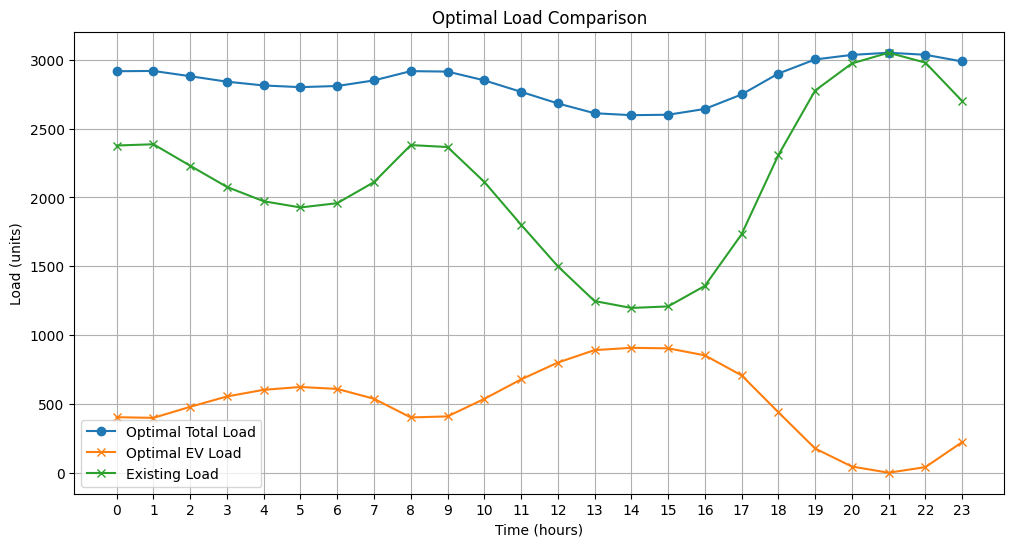

In [105]:
one_car = Problem(objective, constraints)
solution = one_car.solve()

print("Solution is: ")
print(solution)
print("----")
print("Optimal total load:", total_load.value)
print("Optimal EV Load:", ev_load.value)
# print("Charge Added per Vehicle per Hour:", chrg_added.value)
# print("Charging Rate Fraction:", chrg_rate_frac.value)
# print("State of Charge (SOC) per Vehicle per Hour:", soc.value)


hours = np.arange(24)  # 24 hours
# oakland_substation = [oak_capacity for _ in range(hours)]
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(hours, total_load.value, label='Optimal Total Load', marker='o')
plt.plot(hours, ev_load.value, label='Optimal EV Load', marker='x')
plt.plot(hours, exist_load, label='Existing Load', marker='x')
# plt.plot(hours, oakland_substation, label='Oakland Max Capacity', marker='x')
plt.title('Optimal Load Comparison')
plt.xlabel('Time (hours)')
plt.ylabel('Load (units)')
plt.xticks(hours)  # Set x-ticks to be every hour
plt.grid(True)
plt.legend()
plt.show()